#INTRODUCTION TO DATA SCIENCE
#Group 14 -- Project phase 2

## Presentation of the test results

## Team members

|Name| Student ID|
|:---|:-----------:|
|Pham, Quoc Huy| 2299356|
|Hussain, Zakiuddin| 2338350|
|Lee, Daeul Haven| 2308018|
|Preetham| 2288949|
|Jayanth| 2288552|
|Srikavya| 2311351|

## I. Best model from step 1 and step 3

### Random Forest

Random Forest is an ensemble learning algorithm used for classification and regression tasks. It constructs a collection of decision trees, each trained on a random subset of the data and features. By aggregating the predictions of these trees, Random Forest enhances accuracy, generalization, and resilience to overfitting.

**Building a Failure Prediction Model:** <br>
We aim to employ the Random Forest algorithm for a supervised classification problem, specifically failure prediction labeled as 0 (no failure) and 1 (failure) in the status column.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import ParameterGrid

In [ ]:
df = pd.read_csv("Group_14_Clean_Data.csv")

df = df.drop(columns=['Unnamed: 0', 'timestamp'])
label_column = 'status'
X = df.drop(label_column, axis=1)
y = df[label_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the resulting sets
print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)
print(df.head())

Train set shape: (41611, 15) (41611,)
Test set shape: (17834, 15) (17834,)
     TP2    TP3     H1  DV_pressure  Reservoirs  Oil_temperature  \
0 -0.018  8.248  8.238       -0.024       8.248            49.45   
1 -0.018  8.248  8.238       -0.024       8.248            49.45   
2 -0.018  8.248  8.238       -0.024       8.248            49.45   
3 -0.018  8.248  8.238       -0.024       8.248            49.45   
4 -0.018  8.248  8.238       -0.024       8.248            49.45   

   Motor_current  COMP  DV_eletric  Towers  MPG  LPS  Pressure_switch  \
0           0.04   1.0         0.0     1.0  1.0  0.0              1.0   
1           0.04   1.0         0.0     1.0  1.0  0.0              1.0   
2           0.04   1.0         0.0     1.0  1.0  0.0              1.0   
3           0.04   0.0         0.0     0.0  0.0  0.0              0.0   
4           0.04   1.0         0.0     1.0  1.0  0.0              1.0   

   Oil_level  Caudal_impulses  status  
0        1.0              1.0       1

**Hyperparameters of Random Forest:** <br>
Random Forest comes with several hyperparameters that influence its performance. Here are key ones:

- Number of Trees (n_estimators): The total number of decision trees in the forest. Increasing this value generally improves performance until a certain point but can also increase computational cost.
- Maximum Depth of Trees (max_depth): The maximum depth of each decision tree. Deeper trees can capture more complex relationships but may lead to overfitting.
- Minimum Samples Split (min_samples_split): The minimum number of samples required to split an internal node. Higher values prevent small splits that might capture noise but can result in less expressive trees.
- Minimum Samples Leaf (min_samples_leaf): The minimum number of samples required to be in a leaf node. Similar to min_samples_split, it controls overfitting at the leaf level.
- Maximum Features (max_features): The maximum number of features considered for splitting a node. It introduces randomness and can enhance the diversity of trees.

Adjusting these hyperparameters allows fine-tuning the Random Forest model to achieve optimal performance for the specific failure prediction task. Cross-validation and grid search are common techniques for finding the best combination of hyperparameter values.

We will assess the model's performance and identify the optimal hyperparameters using the accuracy score from cross-validation and the out-of-bag error. We opt for randomized search due to its efficiency—training the model with grid search is time-consuming.
- **Randomized Search:**
Randomized Search is a time-efficient hyperparameter tuning technique in machine learning. It randomly samples a fixed number of hyperparameter combinations from the specified space, making it particularly useful for exploring large parameter spaces.

- **Cross Validation:**
Cross Validation is a robust evaluation method that partitions the dataset into subsets, trains the model on some, and evaluates on the rest. It provides a more reliable estimate of a model's generalization performance compared to a single train-test split.

- **Out-of-Bag Error:**
Out-of-Bag (OOB) Error is a metric used in ensemble learning, like Random Forests. It estimates a model's generalization error by evaluating its performance on data points not used in the training of a specific tree. OOB Error is particularly convenient as it doesn't require a separate validation set.

Best Hyperparameters:
{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 10, 'max_depth': 20}
Random Forest Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9031
           1       1.00      1.00      1.00      8803

    accuracy                           1.00     17834
   macro avg       1.00      1.00      1.00     17834
weighted avg       1.00      1.00      1.00     17834



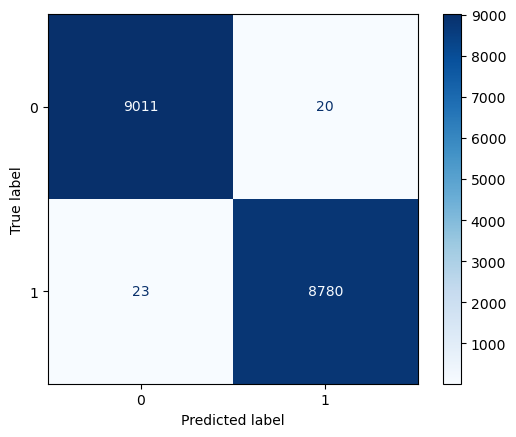

In [ ]:
# Randomized Search
model = RandomForestClassifier(random_state=42)
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [5, 10, 15]
}

# Perform Randomized Search with Cross-Validation
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

# Extract cross-validated scores and hyperparameters
cv_scores = random_search.cv_results_['mean_test_score']
hyperparameters = random_search.cv_results_['params']

# Get the best parameters
best_params = random_search.best_params_

# Train the model with the best parameters
best_model = random_search.best_estimator_
best_model.fit(X_train, y_train)

# Print the best hyperparameters
print('Best Hyperparameters:')
print(best_params)

# Evaluate the model on the test set
y_pred_forest = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_forest)

# Print results
print("Random Forest Classifier:")
print(classification_report(y_test, y_pred_forest))

# Display confusion matrix
conf_matrix_forest = confusion_matrix(y_test, y_pred_forest)
disp_forest = ConfusionMatrixDisplay(conf_matrix_forest, display_labels=best_model.classes_)
disp_forest.plot(cmap='Blues', values_format='d')
plt.show()


Hyperparameters at Each Iteration:
Iteration 1: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 5, 'max_depth': 10} - Mean Accuracy: 99.45%
Iteration 2: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 5, 'max_depth': 10} - Mean Accuracy: 99.45%
Iteration 3: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 15, 'max_depth': 20} - Mean Accuracy: 99.62%
Iteration 4: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 15, 'max_depth': 30} - Mean Accuracy: 99.62%
Iteration 5: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 15, 'max_depth': 30} - Mean Accuracy: 99.61%
Iteration 6: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 5, 'max_depth': 30} - Mean Accuracy: 99.62%
Iteration 7: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 10, 'max_

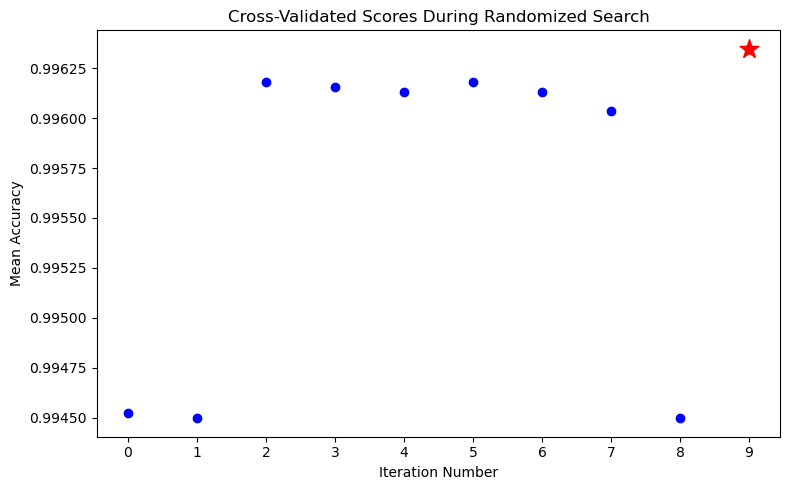

In [ ]:
# Print hyperparameters outside the plot
print("Hyperparameters at Each Iteration:")
for i, params in enumerate(hyperparameters):
    print(f"Iteration {i + 1}: {params} - Mean Accuracy: {cv_scores[i]:.2%}")

# Create a plot for cross-validated scores
plt.figure(figsize=(8, 5))

# Plot the cross-validated scores
plt.scatter(range(len(cv_scores)), cv_scores, c='blue', label='Cross-validated Scores')

# Highlight the best score
best_index = random_search.best_index_
plt.scatter(best_index, cv_scores[best_index], c='red', marker='*', s=200, label='Best Score')

# Customize the plot
plt.title('Cross-Validated Scores During Randomized Search')
plt.xlabel('Iteration Number')
plt.ylabel('Mean Accuracy')

# Set x-ticks as iteration numbers
plt.xticks(range(len(cv_scores)))


plt.tight_layout()

# Show the plot
plt.show()


Best Hyperparameters:
{'n_estimators': 100, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 10}
OOB Score: 99.67%
Random Forest Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9031
           1       1.00      1.00      1.00      8803

    accuracy                           1.00     17834
   macro avg       1.00      1.00      1.00     17834
weighted avg       1.00      1.00      1.00     17834



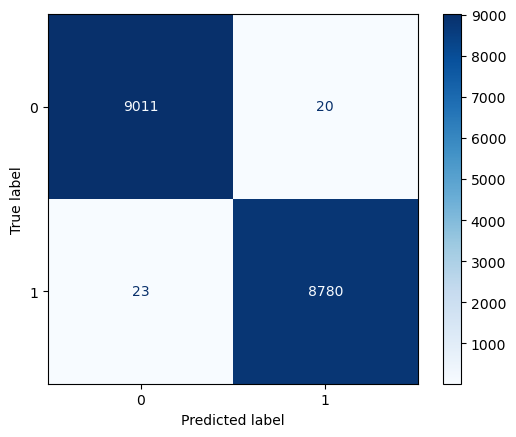

In [ ]:
# Out-Of-Bag Error
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [5, 10, 15]
}

# Initialize a list to store results
results = []
oob_scores = []  # List to store OOB scores during grid search

# Perform randomized grid search with 10 iterations
for _ in range(10):
    params = {key: np.random.choice(values) for key, values in param_dist.items()}
    rf_model = RandomForestClassifier(oob_score=True, random_state=42, **params)
    rf_model.fit(X_train, y_train)
    oob_score = rf_model.oob_score_

    results.append({'params': params, 'oob_score': oob_score})
    oob_scores.append(oob_score)

# Find the best hyperparameters based on the highest OOB score
best_params = max(results, key=lambda x: x['oob_score'])['params']

# Print the best hyperparameters and OOB score
print('Best Hyperparameters:')
print(best_params)
print(f'OOB Score: {max(results, key=lambda x: x["oob_score"])["oob_score"]:.2%}')

# Train the final model with the best hyperparameters on the entire training set
best_model = RandomForestClassifier(oob_score=True, random_state=42, **best_params)
best_model.fit(X_train, y_train)

# Evaluate and print the results on the test set
y_pred_forest = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_forest)

print("Random Forest Classifier:")
print(classification_report(y_test, y_pred_forest))

# Display confusion matrix
conf_matrix_forest = confusion_matrix(y_test, y_pred_forest)
disp_forest = ConfusionMatrixDisplay(conf_matrix_forest, display_labels=best_model.classes_)
disp_forest.plot(cmap='Blues', values_format='d')
plt.show()


Hyperparameters at Each Iteration:
Iteration 1: {'n_estimators': 100, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 10} - OOB Score: 99.67%
Iteration 2: {'n_estimators': 50, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 5} - OOB Score: 99.46%
Iteration 3: {'n_estimators': 100, 'max_depth': 30, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 15} - OOB Score: 99.64%
Iteration 4: {'n_estimators': 50, 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 10} - OOB Score: 99.64%
Iteration 5: {'n_estimators': 200, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 15} - OOB Score: 99.59%
Iteration 6: {'n_estimators': 50, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 10} - OOB Score: 99.60%
Iteration 7: {'n_estimators': 100, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 10} - OOB Score: 99

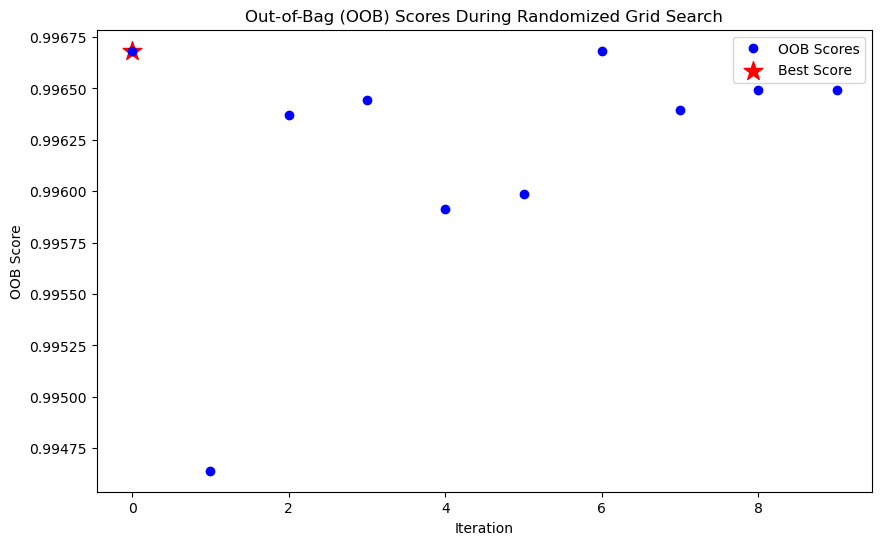

In [ ]:
# Print hyperparameters at each iteration
print("Hyperparameters at Each Iteration:")
for i, params in enumerate(results):
    print(f"Iteration {i + 1}: {params['params']} - OOB Score: {params['oob_score']:.2%}")

# Create a plot for OOB scores during grid search
plt.figure(figsize=(10, 6))

# Plot the OOB scores
plt.plot(oob_scores, marker='o', linestyle=' ', color='b', label='OOB Scores')

# Highlight the best score
best_index = np.argmax(oob_scores)
plt.scatter(best_index, oob_scores[best_index], c='red', marker='*', s=200, label='Best Score')

# Customize the plot
plt.title('Out-of-Bag (OOB) Scores During Randomized Grid Search')
plt.xlabel('Iteration')
plt.ylabel('OOB Score')
plt.legend()

# Show the plot
plt.show()


- Best Hyperparameters using cross-validation: <br>
Iteration 10: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 10, 'max_depth': 20} - Mean Accuracy: 99.63%

- Best Hyperparameters using out-of-bag error: <br>
{'n_estimators': 100, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 10}
OOB Score: 99.67%

While the optimal hyperparameters differ between out-of-bag error and cross-validation, a common trend emerges: higher 'n_estimators' and 'max_depth,' along with smaller 'min_samples_split' and 'min_samples_leaf,' and larger 'max_features,' tend to result in better accuracy. Both models, each using its optimal hyperparameters, demonstrated high accuracy on test set, reaching 100%.

## II. Bidirectional Feature Elimination

### 1. Import library and read the data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


In [ ]:
data = pd.read_csv('Group_14_Clean_Data.csv')

In [ ]:
X = data.iloc[:, 2:-1]
y = data.iloc[:, -1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

From question 1 and 3 we have our RandomForest as the best classifier. The result is shown as below:

Best Hyperparameters:
* 'max_depth': 20
* 'min_samples_leaf': 1
* 'min_samples_split': 2
* 'n_estimators': 50

In [ ]:
best_params = {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
rf = RandomForestClassifier(oob_score=True, random_state=42, **best_params)

|          |precision  |  recall | f1-score  | support|
|-----------|----------|----------|----------|--------|
|          0  |     1.00 |  1.00   |   1.00 |     4480|
|          1  |    1.00  |  1.00   |   1.00 |     4437|
|  accuracy   |          |         |   1.00 |     8917|
| macro avg   |    1.00  |    1.00 |   1.00 |     8917|
| weighted avg|    1.00  |    1.00 |   1.00 |     8917|

### 2. Perform prediction with original data

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=50, oob_score=True,
                       random_state=42)

Random Forest Classifier with original data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6026
           1       1.00      1.00      1.00      5863

    accuracy                           1.00     11889
   macro avg       1.00      1.00      1.00     11889
weighted avg       1.00      1.00      1.00     11889



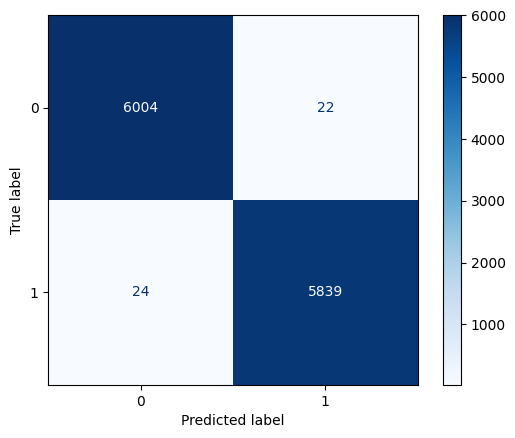

In [ ]:
y_pred_forest = rf.predict(X_test)

print("Random Forest Classifier with original data:")
print(classification_report(y_test, y_pred_forest))
conf_matrix_forest = confusion_matrix(y_test, y_pred_forest)
disp_forest = ConfusionMatrixDisplay(conf_matrix_forest, display_labels=rf.classes_)
disp_forest.plot(cmap='Blues', values_format='d')
plt.show()

### 3. Perform Bidirectional Features Elimination

In [ ]:
num_features_to_select = 7

num_features = len(X_train.columns.tolist())
looped_X_train = X_train.copy()

while num_features> num_features_to_select:
  n1 = num_features-1
  n2 = num_features-2
  sfe = SequentialFeatureSelector(estimator=rf, n_features_to_select=n1, direction = 'forward', n_jobs = -1)
  sbe = SequentialFeatureSelector(estimator=rf, n_features_to_select=n2, direction = 'backward', n_jobs= -1)
  #Eliminating Features with Forward pass
  sfe.fit(looped_X_train, y_train)
  sfe_features = looped_X_train.columns[sfe.support_].tolist()
  looped_X_train = looped_X_train[sfe_features]
  #Eliminating Features with Backward pass
  sbe.fit(looped_X_train, y_train)
  sbe_features = looped_X_train.columns[sbe.support_].tolist()
  looped_X_train = looped_X_train[sbe_features]

  num_features = len(looped_X_train.columns.tolist())

selected_features = looped_X_train.columns
print(f"List of selected features:\n {', '.join(selected_features)}")




List of selected features:
 TP2, H1, DV_pressure, Reservoirs, Oil_temperature, DV_eletric, LPS


### 4. Perform prediction with new set of parameter

In [ ]:
#Fit Random Forest model with selected features
rf.fit(looped_X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=50, oob_score=True,
                       random_state=42)

In [ ]:
selected_features = looped_X_train.columns

Random Forest Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6026
           1       1.00      1.00      1.00      5863

    accuracy                           1.00     11889
   macro avg       1.00      1.00      1.00     11889
weighted avg       1.00      1.00      1.00     11889



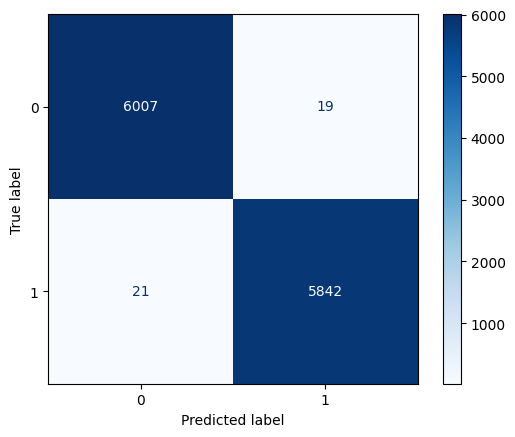

In [ ]:
#EValuate the result of new features
y_pred_forest = rf.predict(X_test[selected_features])
accuracy = accuracy_score(y_test, y_pred_forest)

print("Random Forest Classifier:")
print(classification_report(y_test, y_pred_forest))
conf_matrix_forest = confusion_matrix(y_test, y_pred_forest)
disp_forest = ConfusionMatrixDisplay(conf_matrix_forest, display_labels=rf.classes_)
disp_forest.plot(cmap='Blues', values_format='d')
plt.show()

### 5. Conclusion

From the classification report, we observed that the number of false negatives and false positives has decreased:

* Class 0: 22–>19

* Class 1: 24->21

This shows that the bi-directional feature elimination has not only reduced the dimension of our feature space but also increased the model's performance and accuracy. This suggests that certain features were not contributing significantly to the classification task, leading to more efficient and accurate predictions.



## III. All models from step 5

### 1. Import the Library and read the data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
selected_features = ["TP2", "H1", "DV_pressure", "Reservoirs", "Oil_temperature", "Motor_current", "Oil_level", 'status']

In [ ]:
data = pd.read_csv("Group_14_Clean_Data.csv")
data.head()

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,status
0,562564,2020-04-18 00:00:01,-0.018,8.248,8.238,-0.024,8.248,49.45,0.04,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
1,562565,2020-04-18 00:00:13,-0.018,8.248,8.238,-0.024,8.248,49.45,0.04,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
2,562566,2020-04-18 00:00:24,-0.018,8.248,8.238,-0.024,8.248,49.45,0.04,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
3,562567,2020-04-18 00:00:36,-0.018,8.248,8.238,-0.024,8.248,49.45,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,562568,2020-04-18 00:00:49,-0.018,8.248,8.238,-0.024,8.248,49.45,0.04,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1


In [ ]:
# Choose only features selected from Question 2
#Shuffle the data
data = data.sample(frac = 1)
data.head()

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,status
32984,1484156,2020-08-27 12:38:48,-0.010,8.212,8.198,-0.016,8.214,64.100,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
56604,416777,2020-03-27 15:17:44,10.376,9.996,-0.006,-0.014,9.992,71.875,6.0925,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0
52785,1512857,2020-08-31 10:27:03,-0.014,9.382,9.368,-0.018,9.382,66.950,0.0450,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
54798,588344,2020-04-21 03:57:12,-0.014,8.844,8.832,-0.024,8.846,55.500,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
30977,231046,2020-03-03 06:38:59,9.760,9.378,-0.012,-0.026,9.372,73.450,5.9900,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0


### 2. XGBOOST

- XGBoost, a Gradient Boosted decision tree implementation, excels in Kaggle Competitions.
- It sequentially creates decision trees, assigning weights to variables that are adjusted based on prediction errors.
- This ensemble method, with optimizations like the Approximate Greedy Algorithm and Cash-Aware Access, proves effective for regression, classification, ranking, and user-defined prediction problems.

reference: <BR>
https://xgboost.readthedocs.io/en/stable/python/python_intro.html <BR>
https://www.geeksforgeeks.org/xgboost/ <BR>
https://www.geeksforgeeks.org/ml-xgboost-extreme-gradient-boosting/ <BR>

In [ ]:
#!pip install xgboost
import xgboost as xgb

In [ ]:
X = data[selected_features]
y = data['status']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
class XGBoost():
  def __init__(self):
    self._model = xgb.XGBClassifier()
    self._encoder = OneHotEncoder(categories='auto')

  def fit(self, x, y ):
    self._model.fit(x,y)

  def predict(self, x):
    y_pred = self._model.predict(x)
    return self._encoder.fit_transform(y_pred[:, np.newaxis]).toarray()

In [ ]:
# Fitting XGBoost to the training data
model = XGBoost()
model.fit(X_train, y_train)

In [ ]:
# Predicting the Test set results
y_pred = model.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5948
           1       1.00      1.00      1.00      5941

    accuracy                           1.00     11889
   macro avg       1.00      1.00      1.00     11889
weighted avg       1.00      1.00      1.00     11889



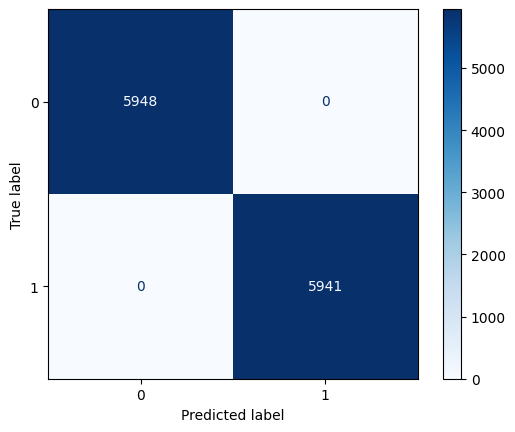

In [ ]:
y_pred = np.argmax(y_pred, axis = 1)
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

disp = ConfusionMatrixDisplay(cm, display_labels=['0', '1'])
disp.plot(cmap='Blues', values_format='d')
plt.show()

### 3. Extreme Learning Machine

* Extreme Learning Machine is a variation of Feed forward neural network with just 1 hidden layer.
* Extreme Machine Learning does not use iterative method such as gradient descent to tuning the weights, instead it use linear algebra to solve for the optimal solution.
* Extreme Machine Learning is believed to be able to approximate any abitrary function given sufficient number of hidden units and data to learn.

In [ ]:
import pandas as pd
import numpy as np
from timeit import timeit as time
import cupy as cp
from  cupy.linalg import pinv as pinv2

import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
selected_features = ["TP2", "H1", "DV_pressure", "Reservoirs", "Oil_temperature", "Motor_current", "Oil_level", 'status']

In [ ]:
data = pd.read_csv("Group_14_Clean_Data.csv")
data.head()

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,status
0,562564,2020-04-18 00:00:01,-0.018,8.248,8.238,-0.024,8.248,49.45,0.04,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
1,562565,2020-04-18 00:00:13,-0.018,8.248,8.238,-0.024,8.248,49.45,0.04,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
2,562566,2020-04-18 00:00:24,-0.018,8.248,8.238,-0.024,8.248,49.45,0.04,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
3,562567,2020-04-18 00:00:36,-0.018,8.248,8.238,-0.024,8.248,49.45,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,562568,2020-04-18 00:00:49,-0.018,8.248,8.238,-0.024,8.248,49.45,0.04,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1


In [ ]:
# Choose only features selected from Question 2
#Shuffle the data
data = data.sample(frac = 1)
data.head()

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,status
5197,567761,2020-04-18 14:27:31,9.040,8.858,-0.006,2.024,8.858,75.500,5.7275,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1
14297,894090,2020-06-05 19:01:58,8.296,8.108,-0.004,2.200,8.108,75.925,5.5075,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1
4083,566647,2020-04-18 11:23:28,8.992,8.798,-0.006,2.014,8.800,75.525,5.7075,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1
10756,842839,2020-05-30 05:16:58,7.274,8.362,-0.010,1.660,8.364,76.275,5.2675,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1
27418,907333,2020-06-07 12:09:00,7.994,7.928,-0.002,1.892,7.930,75.725,5.4150,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1


In [ ]:
X = data[selected_features]
y = data['status']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#this Extreme Machine Learning class is implemented specificly to work on GPU
#this will not run on a CPU machine

class ExtremeLearningMachine():
  def __init__(self, hidden_size = 10, threshold = 0.5):
    self._hidden_size = hidden_size
    self._input_size  = None
    self._w = None
    self._b = None
    self._beta = None
    self._threshold = 0.5
    self._encoder = OneHotEncoder(categories='auto')
    self._scaler  = StandardScaler()

  def encode(self, y):
    return self._encoder.fit_transform(y[:, np.newaxis]).toarray()

  def scale(self,x):
    return self._scaler.transform(x)

  def _h(self,x):
    return self._tanh(cp.dot(x, self._w) + self._b )

  @property
  def hidden_size(self):
    return self._hidden_size

  @staticmethod
  def _tanh(x):
    return cp.tanh(x)

  def fit(self, x, y):
    x = self._scaler.fit_transform(x)
    y = self._encoder.fit_transform(y[:, np.newaxis]).toarray()

    x_gpu = cp.asarray(x)
    y_gpu = cp.asarray(y)

    self._input_size = x.shape[1]
    self._w = cp.random.normal( size = [self._input_size, self._hidden_size])
    self._b = cp.random.normal(size = [self._hidden_size])

    H = self._h(x_gpu)
    self._beta = cp.dot(pinv2(H), y_gpu)

    del x_gpu
    del y_gpu
    cp._default_memory_pool.free_all_blocks()


  def predict(self, x):
    x = self.scale(x)
    x_gpu = cp.asarray(x)
    out_gpu = cp.dot(self._h(x_gpu), self._beta)
    out = cp.asnumpy(out_gpu)
    del out_gpu
    cp._default_memory_pool.free_all_blocks()
    return out

In [ ]:
num_hidden = [5,10,20,30,40,50,60,70]
scores = []

for h in num_hidden:
  elm = ExtremeLearningMachine(h)
  elm.fit(X_train, y_train)
  y_pred = elm.predict(X_test)
  y_pred = np.argmax(y_pred, axis = 1)
  scores.append(accuracy_score(y_test, y_pred))
  #Clear GPU memmory
  del elm
  cp._default_memory_pool.free_all_blocks()

<ipython-input-61-5b2890666025>:34: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = self._encoder.fit_transform(y[:, np.newaxis]).toarray()
<ipython-input-61-5b2890666025>:34: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = self._encoder.fit_transform(y[:, np.newaxis]).toarray()
<ipython-input-61-5b2890666025>:34: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = self._encoder.fit_transform(y[:, np.newaxis]).toarray()
<ipython-input-61-5b2890666025>:34: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future ve

In [ ]:
best_hidden_size_indx = np.argmax(scores)
best_hidden_size = num_hidden[best_hidden_size_indx]
best_score       = scores[best_hidden_size_indx]

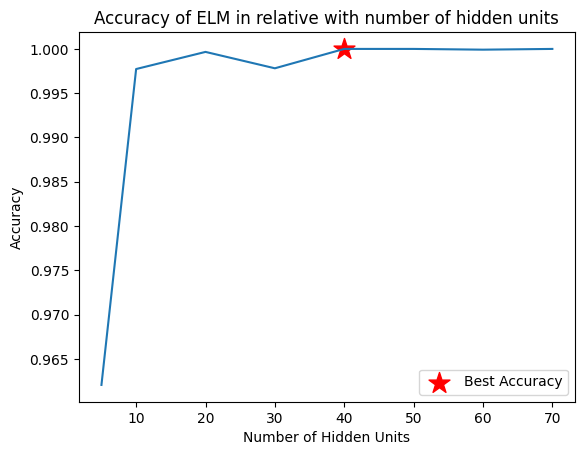

In [ ]:
plt.plot(num_hidden, scores)
plt.scatter(best_hidden_size, best_score, s = 250, marker = "*", color = 'r' , label = 'Best Accuracy')
plt.xlabel('Number of Hidden Units')
plt.ylabel('Accuracy')
plt.title('Accuracy of ELM in relative with number of hidden units' )
plt.legend()
plt.show()

In [ ]:
elm = ExtremeLearningMachine(best_hidden_size)
elm.fit(X_train, y_train)

<ipython-input-61-5b2890666025>:34: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = self._encoder.fit_transform(y[:, np.newaxis]).toarray()


In [ ]:
y_pred = elm.predict(X_test)

Best result achieved with 40 hidden units
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5967
           1       1.00      1.00      1.00      5922

    accuracy                           1.00     11889
   macro avg       1.00      1.00      1.00     11889
weighted avg       1.00      1.00      1.00     11889



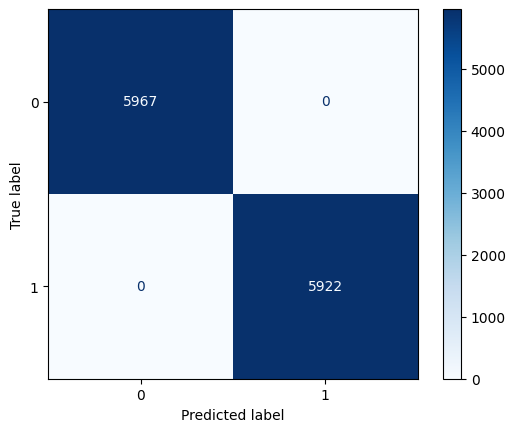

In [ ]:
y_pred = np.argmax(y_pred, axis = 1)

print(f'Best result achieved with {elm.hidden_size} hidden units')
print(classification_report(y_test, y_pred))
c_mat  = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(c_mat, display_labels=['0', '1'])
disp.plot(cmap='Blues', values_format='d')
plt.show()

### 4. Neural Network with 2 hidden layers

**About the Model :**
The neural network model created for this metro dataset consists of two hidden layers, each with 64 neurons, designed to capture complex patterns and relationships within the data. By utilizing a deep learning approach, the model aims to accurately predict the 'status' variable, effectively handling the non-linear and intricate dependencies likely present in the diverse range of features from the metro operational metrics.

**Why TensorFlow and Keras?**

Handling Large and Complex Datasets: since metro dataset is large or complex, TensorFlow and Keras can efficiently handle such datasets. Deep learning models, particularly those built with these frameworks, are known for their ability to process and extract patterns from large volumes of data.

Feature Learning: Deep learning models have the capability to automatically learn and extract features from raw data. This can be particularly useful since dataset contains complex patterns or relationships that are not easily captured with traditional machine learning models.

Non-linear Relationships: Neural networks, which can be easily built using TensorFlow and Keras, are adept at capturing non-linear relationships in the data. The metro dataset has intricate dependencies between variables, a neural network might model these relationships more effectively than a simpler linear model.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix, roc_curve, auc

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [ ]:
# Read the dataset
data = pd.read_csv('Group_14_Clean_Data.csv')

# Choose only features selected from Question 2
#Shuffle the data
data = data.sample(frac = 1)
data.head()

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,status
23262,903144,2020-06-06 23:44:43,8.194,7.974,-0.010,2.128,7.976,75.300,5.6025,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1
41633,736676,2020-05-14 12:09:29,-0.012,9.574,9.560,-0.022,9.574,58.400,3.4900,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
14025,893818,2020-06-05 18:17:01,5.582,8.156,-0.006,1.280,8.158,75.675,5.0925,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1
21627,901420,2020-06-06 15:12:59,6.064,8.090,-0.006,1.444,8.090,75.825,5.1375,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1
35681,1514037,2020-08-31 13:41:59,9.026,8.578,-0.018,-0.016,8.576,62.475,5.9575,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0


In [ ]:
# Preprocessing the data
selected_features = ["TP2", "H1", "DV_pressure", "Reservoirs", "Oil_temperature", "Motor_current", "Oil_level", 'status']
X = data[selected_features]
y = data['status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create the neural network model

class NeuralNet(tf.keras.Model):
  def __init__(self, *args, **kwargs):
    super().__init__(**kwargs)
    self._model = Sequential(name = "Model")
    self._model.add(Dense(32, input_dim=X_train.shape[1], activation='tanh'))
    self._model.add(Dense(32, activation='tanh'))  # First hidden layer
    self._model.add(Dense(32, activation='tanh'))  # Second hidden layer
    self._model.add(Dense(2, activation='softmax'))  # Output layer

    early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)
    lr_scheduler = ReduceLROnPlateau(monitor='val_accuracy', factor=0.6, patience=0, verbose=1, min_lr=1e-6)

    self._callbacks = [early_stopping, lr_scheduler]
    # Compile the model
    self._model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

    self._scaler = StandardScaler()
    self._encoder= OneHotEncoder(categories='auto')

  def encode(self, y):
    return self._encoder.transform(y[:, np.newaxis]).toarray()

  def fit(self, x, y, **kwargs):

    x = self._scaler.fit_transform(x)
    y = self._encoder.fit_transform(y[:, np.newaxis]).toarray()

    x = tf.convert_to_tensor(x)
    y = tf.convert_to_tensor(y)
    self._model.fit(x, y , callbacks = self._callbacks,  **kwargs)

  def predict(self, x):
    x = self._scaler.transform(x)
    x = tf.convert_to_tensor(x)
    y_pred = self._model.predict(x)
    return y_pred

In [ ]:
model = NeuralNet()

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=5, validation_split=0.2, verbose = 1)

Epoch 1/5


<ipython-input-139-2c0b25ae3745>:28: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = self._encoder.fit_transform(y[:, np.newaxis]).toarray()


1189/1189 [==============================] - 8s 5ms/step - loss: 0.0122 - accuracy: 0.9982 - val_loss: 2.5327e-04 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 2/5
1186/1189 [============================>.] - ETA: 0s - loss: 1.3997e-04 - accuracy: 1.0000
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.0006000000284984708.
1189/1189 [==============================] - 5s 4ms/step - loss: 1.3981e-04 - accuracy: 1.0000 - val_loss: 7.3704e-05 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 3/5
1180/1189 [============================>.] - ETA: 0s - loss: 5.6537e-05 - accuracy: 1.0000
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0003600000170990825.
1189/1189 [==============================] - 7s 6ms/step - loss: 5.6459e-05 - accuracy: 1.0000 - val_loss: 4.0886e-05 - val_accuracy: 1.0000 - lr: 6.0000e-04
Epoch 4/5
1186/1189 [============================>.] - ETA: 0s - loss: 3.4330e-05 - accuracy: 1.0000
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00021600000327453016.
1189/1

In [ ]:
# Evaluate the model
y_pred = model.predict(X_test)

372/372 [==============================] - 1s 3ms/step


In [ ]:
y_pred = tf.math.argmax(y_pred, axis = 1)

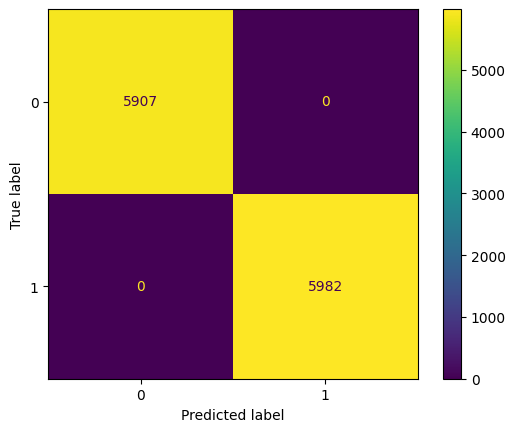

In [ ]:
# Display the confusion matrix
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [ ]:
# Accuracy score
print(accuracy_score(y_test, y_pred))

# Classification report
print(classification_report(y_test, y_pred))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5907
           1       1.00      1.00      1.00      5982

    accuracy                           1.00     11889
   macro avg       1.00      1.00      1.00     11889
weighted avg       1.00      1.00      1.00     11889



### 5. Ensemble Method

From the performance of all algorithms, we decided to choose 3 algorithm that have highest scores and relatively short training time:

* XGBoost
* Extreme Learning Machine
* Neural network (2 hidden layers)

Since each model will output a tensor of shape [None, 2] represent the probability of the sample belong to class 0 and class 1 respectively, our ensemble method simply calculate the average of 3 predicted probability.

In [ ]:
# Read the dataset
data = pd.read_csv('Group_14_Clean_Data.csv')

# Choose only features selected from Question 2
# Shuffle the data
data = data.sample(frac = 1)
data.head()

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,status
57257,517540,2020-04-11 09:23:09,-0.022,10.060,10.056,-0.024,10.058,65.950,3.8475,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
43132,297575,2020-03-12 08:42:28,9.758,9.554,-0.008,0.786,9.558,75.925,5.8825,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0
7988,570552,2020-04-18 22:08:34,9.110,8.956,-0.010,2.026,8.954,73.725,5.8200,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1
32841,289916,2020-03-11 02:00:23,-0.012,9.222,9.212,-0.022,9.218,61.975,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0
24629,904544,2020-06-07 04:28:11,8.134,7.912,-0.006,1.928,7.912,75.200,5.4975,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1


In [ ]:
# Preprocessing the data
selected_features = ["TP2", "H1", "DV_pressure", "Reservoirs", "Oil_temperature", "Motor_current", "Oil_level", 'status']
X = data[selected_features]
y = data['status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
class EnsembleModel():

  def __init__(self, clfs = [], *args, **kwargs):
    self._clfs = clfs

  def fit(self, x, y):
    for c in self._clfs:
      c.fit(x,y)

  def predict(self, x):
    y_pred = self._clfs[0].predict(x)
    for c in self._clfs[1:]:
      y_pred += c.predict(x)
    return y_pred/len(self._clfs)


In [ ]:
clf1 = NeuralNet()
clf2 = ExtremeLearningMachine(40)
clf3 = XGBoost()

ensembled = EnsembleModel(clfs = [clf1, clf2, clf3])

In [ ]:
ensembled.fit(X_train, y_train)

<ipython-input-139-2c0b25ae3745>:28: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = self._encoder.fit_transform(y[:, np.newaxis]).toarray()


1479/1487 [============================>.] - ETA: 0s - loss: 0.0128 - accuracy: 0.9978

1487/1487 [==============================] - 8s 5ms/step - loss: 0.0128 - accuracy: 0.9978 - lr: 0.0010


<ipython-input-61-5b2890666025>:34: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = self._encoder.fit_transform(y[:, np.newaxis]).toarray()


In [ ]:
y_pred = ensembled.predict(X_test)

372/372 [==============================] - 1s 2ms/step


In [ ]:
y_pred = np.argmax(y_pred, axis = 1)

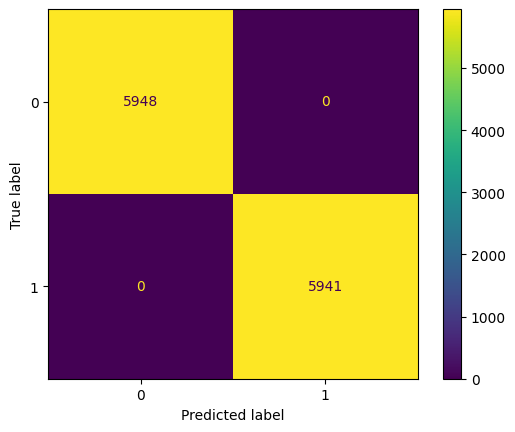

In [ ]:
# Display the confusion matrix
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [ ]:
# Accuracy score
print(f"Accuracy of Ensemble method {accuracy_score(y_test, y_pred)}")

# Classification report
print(classification_report(y_test, y_pred))

Accuracy of Ensemble method 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5948
           1       1.00      1.00      1.00      5941

    accuracy                           1.00     11889
   macro avg       1.00      1.00      1.00     11889
weighted avg       1.00      1.00      1.00     11889

